In [1]:
import pickle

# Load data from pickle files
with open('train_data.pkl', 'rb') as file:
    train_mfccs, train_labels_onehot = pickle.load(file)

with open('valid_data.pkl', 'rb') as file:
    valid_mfccs, valid_labels_onehot = pickle.load(file)

with open('test_data.pkl', 'rb') as file:                                   
    test_mfccs, test_labels_onehot = pickle.load(file)

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, LSTM, Dense, BatchNormalization, GlobalAveragePooling2D, Reshape, Permute, GlobalAveragePooling1D
 

In [3]:
# Define the hybrid model architecture
model = Sequential()

# CNN layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(13, 235, 1), padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Global Average Pooling
model.add(GlobalAveragePooling2D())

# Reshape to add a time dimension
model.add(Reshape((1, 128)))

# RNN layer (LSTM)
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64))

# Dense layers
model.add(Dense(128, activation='relu'))
model.add(Dense(8, activation='softmax'))  # Assuming 8 emotion classes


In [4]:
# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 13, 235, 32)       320       
                                                                 
 batch_normalization (BatchN  (None, 13, 235, 32)      128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 6, 117, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 117, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 6, 117, 64)       256       
 hNormalization)                                                 
                                                        

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train_mfccs, train_labels_onehot, epochs=100, validation_data=(valid_mfccs, valid_labels_onehot), verbose=1)

In [ ]:
# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(test_mfccs, test_labels_onehot, verbose=0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

In [ ]:
# Save the entire model (including architecture, optimizer, and learned weights)
model.save('prototype3.h5')

# If you only want to save the architecture and weights (not the optimizer)
model.save_weights('p3_weights.h5')

In [2]:
import tensorflow as tf
model = tf.keras.models.load_model('prototype3.h5')

KeyboardInterrupt: 

In [6]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming your model is named 'model' and you have test data 'test_mfccs' and 'test_labels_one_hot'

# Make predictions on the test set
predictions = model.predict(test_mfccs)

# Convert one-hot encoded labels back to categorical labels
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels_onehot, axis=1)

# Evaluate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)

# Evaluate precision, recall, and F1 score
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


5/5 [==============================] - 13s 57ms/step
Accuracy: 0.7866666666666666
Precision: 0.808248232376648
Recall: 0.7866666666666666
F1 Score: 0.7826185001178217


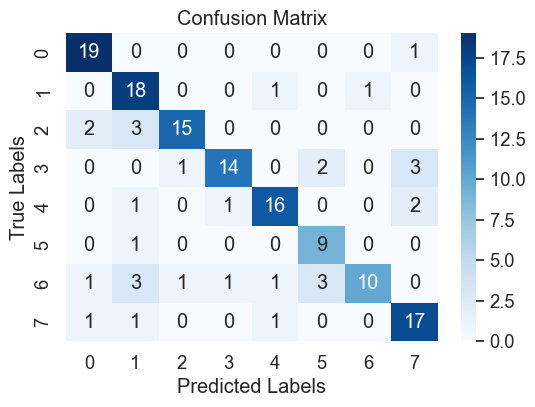

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Assuming you have true_labels and predicted_labels

# Get unique class labels
class_labels = unique_labels(true_labels, predicted_labels)

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=class_labels)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


In [22]:
import pickle
from sklearn.preprocessing import LabelEncoder

# Load the label encoder from the pickle file
with open('label_encoder.pkl', 'rb') as file:
    label_encoder = pickle.load(file)

# Assuming 'new_data_mfccs' is the preprocessed data for prediction
# Use the trained model to make predictions
predictions = model.predict(test_mfccs)

# Convert the numerical predictions back to original class labels using the loaded label encoder
predicted_labels = label_encoder.inverse_transform(np.argmax(predictions, axis=1))

# Now 'predicted_labels' contains the predicted class labels for 'new_data'
print("Predicted Labels:", predicted_labels)


5/5 [==============================] - 1s 37ms/step
Predicted Labels: ['surprised' 'angry' 'angry' 'angry' 'angry' 'angry' 'angry' 'angry'
 'angry' 'angry' 'angry' 'angry' 'angry' 'angry' 'angry' 'angry' 'angry'
 'angry' 'angry' 'angry' 'calm' 'calm' 'calm' 'calm' 'calm' 'calm' 'sad'
 'happy' 'calm' 'calm' 'calm' 'calm' 'calm' 'calm' 'calm' 'calm' 'calm'
 'calm' 'calm' 'calm' 'angry' 'disgust' 'disgust' 'disgust' 'calm' 'calm'
 'calm' 'disgust' 'disgust' 'disgust' 'disgust' 'disgust' 'disgust'
 'angry' 'disgust' 'disgust' 'disgust' 'disgust' 'disgust' 'disgust'
 'surprised' 'neutral' 'fearful' 'fearful' 'fearful' 'surprised' 'neutral'
 'surprised' 'fearful' 'fearful' 'fearful' 'fearful' 'fearful' 'fearful'
 'disgust' 'fearful' 'fearful' 'fearful' 'fearful' 'fearful' 'happy'
 'happy' 'happy' 'happy' 'calm' 'fearful' 'surprised' 'happy' 'happy'
 'happy' 'happy' 'happy' 'happy' 'happy' 'happy' 'happy' 'surprised'
 'happy' 'happy' 'happy' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral'
 

In [30]:
import librosa
import numpy as np  
import pickle
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf 

# Load the label encoder from the pickle file
with open('E:\My_Projects\Emotion_Classifier\p3_model\label_encoder.pkl', 'rb') as file:
    label_encoder = pickle.load(file)

model = tf.keras.models.load_model('E:\My_Projects\Emotion_Classifier\p3_model\prototype3.h5')


def make_prediction(file_path):
    audio_clip, mfccs = [], []
    audio_clip, _ = librosa.load(file_path, sr=None, duration=2.5)
    mfccs = librosa.feature.mfcc(y=audio_clip, sr=22050, n_mfcc=13)
    feature_mfcc = np.array(mfccs)
    feature_mfcc /= np.max(np.abs(feature_mfcc))
    #predictions = model.predict(feature_mfcc)

    # Convert the numerical predictions back to original class labels using the loaded label encoder
    #predicted_labels = label_encoder.inverse_transform(np.argmax(predictions, axis=1))

    # Now 'predicted_labels' contains the predicted class labels for 'new_data'
    #print("Predicted Labels:", predicted_labels)
    print(feature_mfcc.shape)
audio_path = "E:\\My_Projects\\Emotion_Classifier\\test\\Angry_emotion.wav"
make_prediction(audio_path)

(13, 216)


In [2]:
import librosa
import numpy as np  
import pickle
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf 

# Load the label encoder from the pickle file
with open('E:\My_Projects\Emotion_Classifier\p3_model\label_encoder.pkl', 'rb') as file:
    label_encoder = pickle.load(file)

model = tf.keras.models.load_model('E:\My_Projects\Emotion_Classifier\p3_model\prototype3.h5')

def make_prediction(file_path):
    # Load audio clip using librosa
    audio_clip, _ = librosa.load(audio_path, sr=None)

    # Trim audio to 2.5 seconds
    audio_clip = audio_clip[:int(2.5 * 22050)]  # Assuming a sampling rate of 22050 Hz

    # Compute MFCCs
    mfccs = librosa.feature.mfcc(y=audio_clip, sr=22050, n_mfcc=13, n_fft=512, hop_length=256)

    # Normalize MFCCs
    mfccs /= np.max(np.abs(mfccs))

    # Transpose the MFCCs to have the time steps as the first dimension
    mfccs = mfccs.T

    # Pad or truncate the time steps to match the model's input shape
    desired_time_steps = 235
    if len(mfccs) < desired_time_steps:
        mfccs = np.pad(mfccs, ((0, desired_time_steps - len(mfccs)), (0, 0)))
    elif len(mfccs) > desired_time_steps:
        mfccs = mfccs[:desired_time_steps, :]

    # Reshape to match the model's input shape
    mfccs = mfccs.reshape(1, 13, desired_time_steps, 1)  # Adjust the order of dimensions

    # Make prediction
    predictions = model.predict(mfccs)

    # Convert the numerical predictions back to original class labels using the loaded label encoder
    predicted_labels = label_encoder.inverse_transform(np.argmax(predictions, axis=1))
    print("Predicted Labels:", predicted_label)


audio_path = 'C:\\Users\\adity\\Downloads\\YAF_base_happy.wav'
make_prediction(audio_path)

1/1 [==============================] - 8s 8s/step


ValueError: Found array with dim 3. None expected <= 2.

In [32]:
import librosa
import numpy as np  
import pickle
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf 

# Load the label encoder from the pickle file
with open('E:/My_Projects/Emotion_Classifier/p3_model/label_encoder.pkl', 'rb') as file:
    label_encoder = pickle.load(file)

model = tf.keras.models.load_model('E:/My_Projects/Emotion_Classifier/p3_model/prototype3.h5')

def make_prediction(audio_path):  # Fix the parameter name here (audio_path instead of file_path)
    # Load audio clip using librosa
    audio_clip, _ = librosa.load(audio_path, sr=None)

    # Trim audio to 2.5 seconds
    audio_clip = audio_clip[:int(2.5 * 22050)]  # Assuming a sampling rate of 22050 Hz

    # Compute MFCCs
    mfccs = librosa.feature.mfcc(y=audio_clip, sr=22050, n_mfcc=13, n_fft=512, hop_length=256)

    # Normalize MFCCs
    mfccs /= np.max(np.abs(mfccs))

    # Transpose the MFCCs to have the time steps as the first dimension
    mfccs = mfccs.T

    # Pad or truncate the time steps to match the model's input shape
    desired_time_steps = 235
    if len(mfccs) < desired_time_steps:
        mfccs = np.pad(mfccs, ((0, desired_time_steps - len(mfccs)), (0, 0)))
    elif len(mfccs) > desired_time_steps:
        mfccs = mfccs[:desired_time_steps, :]

    # Reshape to match the model's input shape
    mfccs = mfccs.reshape(1, 13, desired_time_steps, 1)  # Adjust the order of dimensions

    # Make prediction
    predictions = model.predict(mfccs)

    # Convert the numerical predictions back to original class labels using the loaded label encoder
    predicted_labels = label_encoder.inverse_transform(np.argmax(predictions, axis=1))
    print("Predicted Labels:", predicted_labels)  # Fix the variable name here (predicted_labels instead of predicted_label)
    print(predictions)
    
make_prediction(audio_path)


1/1 [==============================] - 1s 697ms/step
Predicted Labels: ['angry']
[[9.9959177e-01 1.2603243e-07 3.7387310e-04 2.9430739e-05 1.9772895e-06
  3.4144192e-09 1.4671824e-07 2.5957590e-06]]
angry: 99.96%
calm: 0.00%
disgust: 0.04%
fearful: 0.00%
happy: 0.00%
neutral: 0.00%
sad: 0.00%
surprised: 0.00%


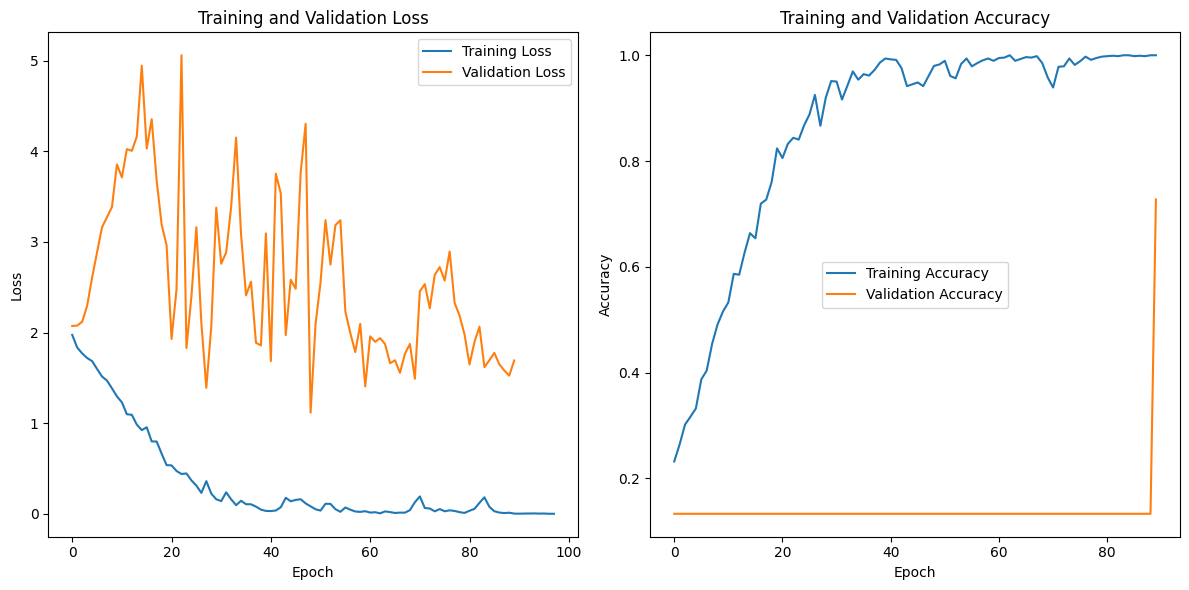

In [5]:
import matplotlib.pyplot as plt

# Replace these lists with your actual training history
training_loss = [1.9744, 1.8351, 1.7707, 1.7197, 1.6853, 1.5984, 1.5152, 1.4711, 1.3848, 1.2959, 
                 1.2307, 1.0996, 1.0930, 0.9849, 0.9242, 0.9557, 0.7993, 0.7982, 0.6645, 0.5380, 
                 0.5347, 0.4734, 0.4399, 0.4457, 0.3694, 0.3121, 0.2316, 0.3611, 0.2238, 0.1612, 
                 0.1409, 0.2374, 0.1605, 0.0960, 0.1445, 0.1064, 0.1058, 0.0801, 0.0469, 0.0326, 
                 0.0309, 0.0370, 0.0734, 0.1773, 0.1389, 0.1537, 0.1615, 0.1154, 0.0832, 0.0506, 
                 0.0361, 0.1112, 0.1101, 0.0515, 0.0225, 0.0701, 0.0457, 0.0262, 0.0217, 0.0296, 
                 0.0139, 0.0184, 0.0056, 0.0272, 0.0194, 0.0101, 0.0136, 0.0135, 0.0406, 0.1285, 
                 0.1924, 0.0649, 0.0591, 0.0278, 0.0529, 0.0285, 0.0390, 0.0321, 0.0189, 0.0103, 
                 0.0342, 0.0553, 0.1214, 0.1827, 0.0778, 0.0287, 0.0143, 0.0090, 0.0127, 0.0030, 
                 0.0019, 0.0035, 0.0039, 0.0047, 0.0031, 0.0036, 0.0011, 7.2211e-04]

training_accuracy = [0.2319, 0.2642, 0.3017, 0.3165, 0.3322, 0.3871, 0.4037, 0.4542, 0.4908, 0.5153, 
                     0.5327, 0.5867, 0.5850, 0.6269, 0.6635, 0.6539, 0.7193, 0.7271, 0.7602, 0.8239, 
                     0.8056, 0.8326, 0.8439, 0.8405, 0.8675, 0.8884, 0.9250, 0.8666, 0.9198, 0.9512, 
                     0.9503, 0.9163, 0.9425, 0.9695, 0.9538, 0.9643, 0.9616, 0.9721, 0.9861, 0.9939, 
                     0.9922, 0.9913, 0.9756, 0.9416, 0.9451, 0.9486, 0.9416, 0.9608, 0.9799, 0.9826, 
                     0.9895, 0.9608, 0.9564, 0.9834, 0.9939, 0.9791, 0.9852, 0.9904, 0.9939, 0.9895, 
                     0.9948, 0.9956, 1.0000, 0.9895, 0.9930, 0.9965, 0.9956, 0.9983, 0.9852, 0.9582, 
                     0.9390, 0.9782, 0.9791, 0.9939, 0.9817, 0.9887, 0.9974, 0.9913, 0.9948, 0.9974, 
                     0.9983, 0.9991, 0.9983, 1.0000, 1.0000, 0.9983, 0.9991, 0.9983, 1.0000, 1.0000]

validation_loss = [2.0729, 2.0777, 2.1195, 2.2959, 2.6068, 2.8867, 3.1625, 3.2729, 3.3866, 3.8557, 
                   3.7125, 4.0246, 4.0054, 4.1632, 4.9453, 4.0311, 4.3546, 3.6774, 3.1932, 2.9641, 
                   1.9296, 2.4753, 5.0601, 1.8301, 2.3993, 3.1630, 2.1077, 1.3909, 2.0658, 3.3790, 
                   2.7597, 2.8850, 3.3866, 4.1518, 3.0794, 2.4107, 2.5619, 1.8882, 1.8583, 3.0942, 
                   1.6855, 3.7532, 3.5353, 1.9724, 2.5826, 2.4841, 3.7675, 4.3041, 1.1170, 2.0954, 
                   2.5534, 3.2406, 2.7511, 3.1859, 3.2397, 2.2319, 1.9941, 1.7848, 2.0958, 1.4066, 
                   1.9589, 1.8984, 1.9391, 1.8727, 1.6624, 1.6945, 1.5566, 1.7677, 1.8748, 1.4909, 
                   2.4545, 2.5347, 2.2679, 2.6371, 2.7229, 2.5737, 2.8944, 2.3286, 2.1877, 1.9793, 
                   1.6487, 1.8965, 2.0650, 1.6193, 1.6945, 1.7761, 1.6505, 1.5822, 1.5252, 1.6923]

validation_accuracy = [0.1329, 0.1329, 0.1329, 0.1329, 0.1329, 0.1329, 0.1329, 0.1329, 0.1329, 0.1329, 
                       0.1329, 0.1329, 0.1329, 0.1329, 0.1329, 0.1329, 0.1329, 0.1329, 0.1329, 0.1329, 
                       0.1329, 0.1329, 0.1329, 0.1329, 0.1329, 0.1329, 0.1329, 0.1329, 0.1329, 0.1329, 
                       0.1329, 0.1329, 0.1329, 0.1329, 0.1329, 0.1329, 0.1329, 0.1329, 0.1329, 0.1329, 
                       0.1329, 0.1329, 0.1329, 0.1329, 0.1329, 0.1329, 0.1329, 0.1329, 0.1329, 0.1329, 
                       0.1329, 0.1329, 0.1329, 0.1329, 0.1329, 0.1329, 0.1329, 0.1329, 0.1329, 0.1329, 
                       0.1329, 0.1329, 0.1329, 0.1329, 0.1329, 0.1329, 0.1329, 0.1329, 0.1329, 0.1329, 
                       0.1329, 0.1329, 0.1329, 0.1329, 0.1329, 0.1329, 0.1329, 0.1329, 0.1329, 0.1329, 
                       0.1329, 0.1329, 0.1329, 0.1329, 0.1329, 0.1329, 0.1329, 0.1329, 0.1329, 0.7273]

# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
